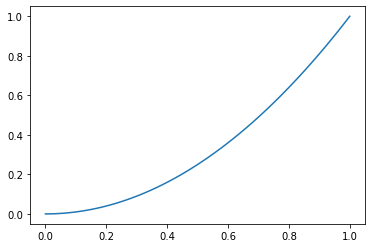

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,1,100)
y=x**2
plt.plot(x,y)

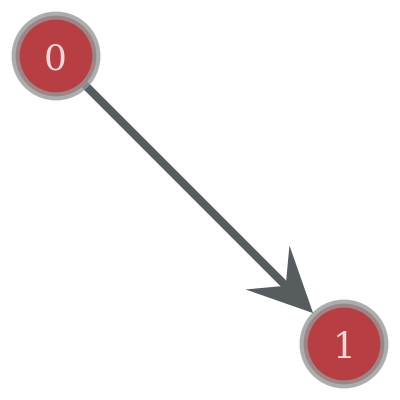

In [3]:
import graph_tool.all as gt
g=gt.Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)

gt.graph_draw(g,
            vertex_text = g.vertex_index,
            vertex_font_size = 18,
            output_size = (200 ,200));

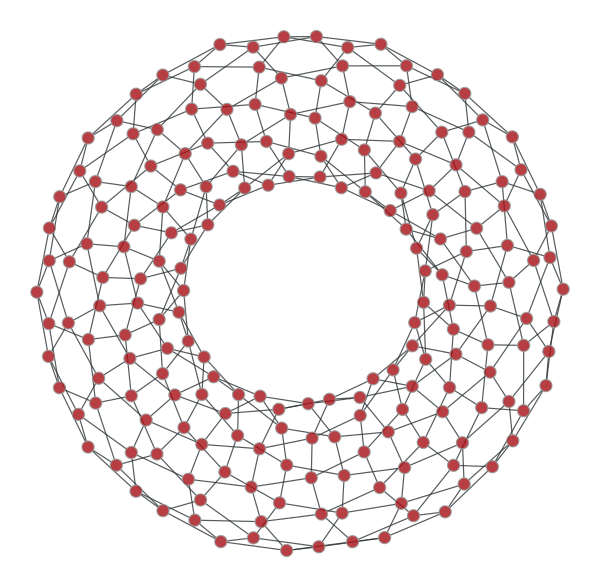

In [4]:
#周期境界条件を持つ10x20正方格子グラフ
g=gt.lattice([10, 20], periodic=True)
pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(g, pos = pos, output_size=(300, 300));

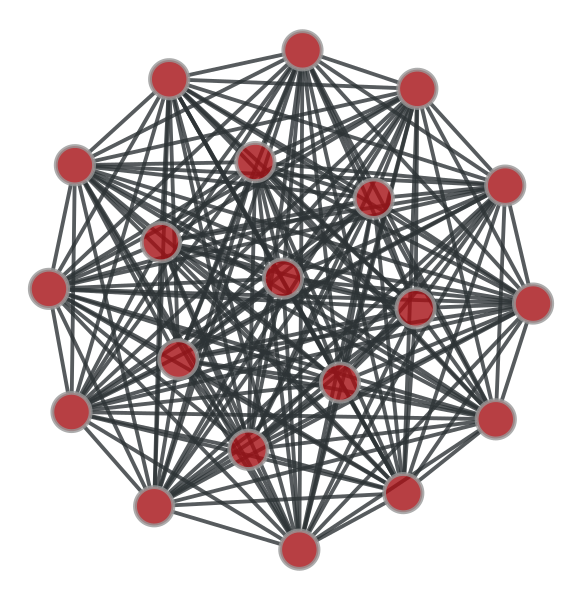

In [10]:
#ノード数20の完全グラフ
g=gt.complete_graph(20)
pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(g, pos=pos, output_size=(300, 300));

In [6]:
import torch
print(torch.cuda.is_available())

True


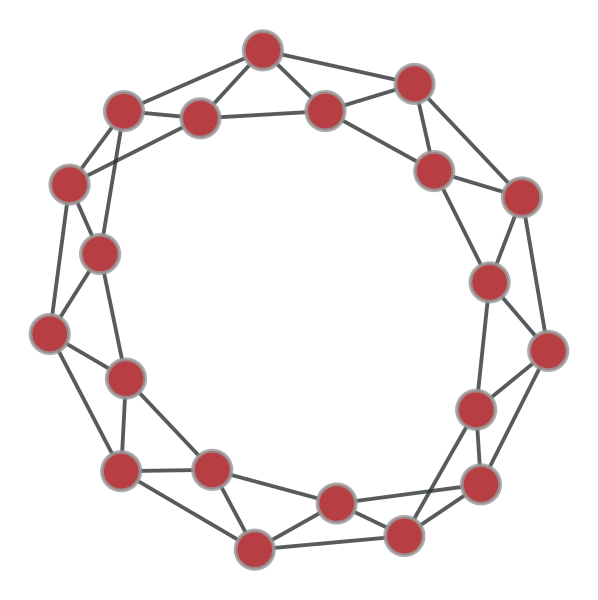

In [11]:
#第二隣接ノードとも接続された円形格子
g = gt.circular_graph(20, 2)
pos = gt.sfdp_layout(g, cooling_step= 0.95, epsilon=1e-2)
gt.graph_draw(g, pos=pos, output_size=(300, 300));

In [15]:
import numpy.random as rnd
def ws_graph(n, k, p):
    base_g = gt.circular_graph(n, k)
    if p==0:
        return base_g
    g = gt.Graph(directed = False)
    g.add_vertex(n)

    for edg in base_g.edges():
        st_vtx = edg.source()
        tg_vtx = edg.target()
        if rnd.random() < p:
            nw_tg_idx = rnd.choice(n)
            nw_tg_vtx = base_g.vertex(nw_tg_idx)
            while ((nw_tg_vtx in st_vtx.all_neighbors()) or nw_tg_vtx == st_vtx):
                nw_tg_idx = rnd.choice(n)
                nw_tg_vtx = base_g.vertex(nw_tg_idx)

            if g.edge(st_vtx, nw_tg_vtx) == None:
                g.add_edge(st_vtx, nw_tg_vtx)

        else:
            if g.edge(st_vtx, tg_vtx) == None:
                g.add_edge(st_vtx, tg_vtx)

    return g


In [16]:
ws_g = ws_graph(40, 2, 0.99)

UnboundLocalError: local variable 'nw_tg_vtx' referenced before assignment